In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import equilibrator_api
from equilibrator_api import ComponentContribution, Q_, ureg
import equilibrator_pathway

print('equlibrator_api version:', equilibrator_api.__version__)
print('equlibrator_pathway version:', equilibrator_pathway.__version__)
# with corrections of code in reaction_plot function of thermo_models

ureg.default_format = ".3f~P"
plt.rc('axes', axisbelow=True)
ureg.setup_matplotlib(True)

comp_contrib = ComponentContribution()
Pathway = equilibrator_pathway.Pathway

equlibrator_api version: 0.3.1
equlibrator_pathway version: 0.3.1
Fragments already downloaded
Fragments already downloaded


## Conditions
pH 7.5, ionic strength 0.25 M.

## 1 Homoserine cycle
Upper bound for FA is set to 0.5mM.

In [2]:
HomSer = Pathway.from_sbtab('HomSer.tsv', comp_contrib=comp_contrib)

HomSer.update_standard_dgs()
HS_mdf = HomSer.calc_mdf()

print('Homoserine cycle MDF: ', HS_mdf.mdf)

Homoserine cycle MDF:  12.552 kJ/mol


In [3]:
HS_mdf.compound_df

,compound,concentration,shadow_price,lower_bound,upper_bound
0,h2o,1.000 M,0.000000,1.000 M,1.000 M
1,atp,0.005 M,0.000000,5.000 mM,5.000 mM
2,adp,0.001 M,0.000000,0.500 mM,0.500 mM
3,nad,0.001 M,0.000000,1.000 mM,1.000 mM
4,pi,0.010 M,0.000000,10.000 mM,10.000 mM
5,nadh,0.000 M,0.000000,0.100 mM,0.100 mM
6,coa,0.001 M,0.000000,1.000 mM,1.000 mM
7,nh3,0.010 M,0.000000,10.000 mM,10.000 mM
8,akg,0.001 M,-0.892516,0.500 mM,0.500 mM
9,accoa,0.000 M,0.000000,0.001 mM,10.000 mM


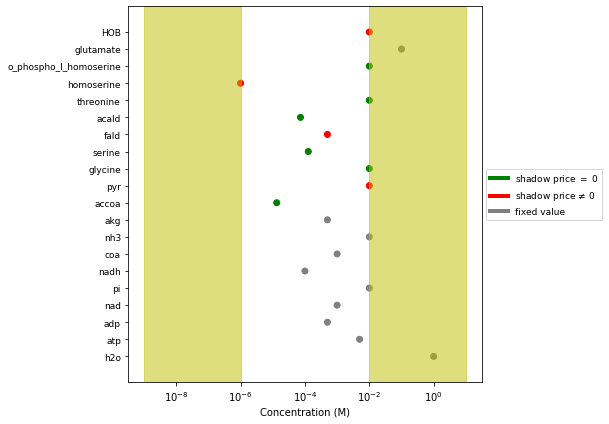

In [4]:
# HS_mdf.compound_df.to_excel('HomS_comp.xlsx')
HS_comp_plot = HS_mdf.compound_plot
# HS_comp_plot.savefig('HomSer_comp.eps')

In [5]:
HS_mdf.reaction_df

,reaction_id,reaction_formula,flux,standard_dg_prime,physiological_dg_prime,optimized_dg_prime,shadow_price
0,SAL,"Compound(id=31, inchi_key=DHMQDGOQFOQNFH-UHFFF...",1.000 mM/s,-18.885 kJ/mol,-1.770 kJ/mol,-12.552 kJ/mol,0.000000
1,SDH,"Compound(id=53, inchi_key=MTCFGRXMJLQNBG-REOHC...",1.000 mM/s,-28.915 kJ/mol,-46.030 kJ/mol,-28.631 kJ/mol,0.000000
2,HAL,"Compound(id=25, inchi_key=LCTONWCANYUPML-UHFFF...",1.000 mM/s,-31.723 kJ/mol,-14.608 kJ/mol,-12.552 kJ/mol,0.107484
3,HAT,"Compound(id=74378, inchi_key=WHUUTDBJXJRKMK-VK...",1.000 mM/s,29.584 kJ/mol,29.584 kJ/mol,-12.552 kJ/mol,0.892516
4,HSK,"Compound(id=6, inchi_key=ZKHQWZAMYRWXGA-KQYNXX...",1.000 mM/s,-36.320 kJ/mol,-36.320 kJ/mol,-13.907 kJ/mol,0.000000
5,TS,"Compound(id=5, inchi_key=XLYOFNOQVPJJNP-UHFFFA...",1.000 mM/s,-28.450 kJ/mol,-45.565 kJ/mol,-38.446 kJ/mol,0.000000
6,LTA,"Compound(id=134, inchi_key=AYFVYJQAPQTCCC-GBXI...",1.000 mM/s,9.903 kJ/mol,-7.212 kJ/mol,-12.552 kJ/mol,0.000000
7,ADH,"Compound(id=11, inchi_key=BAWFJGJZGIEFAR-NNYOX...",1.000 mM/s,-20.566 kJ/mol,-3.451 kJ/mol,-12.552 kJ/mol,0.000000


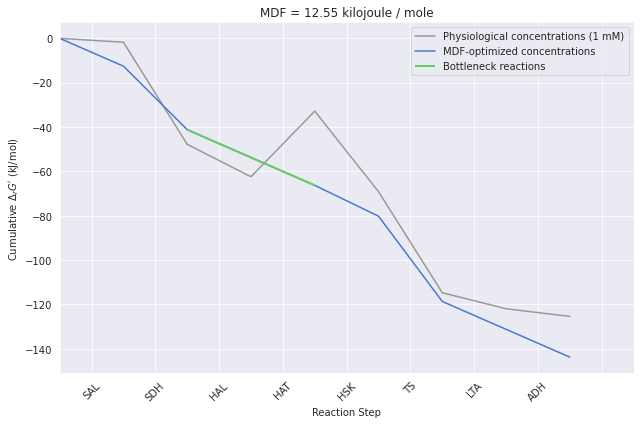

In [6]:
# HS_mdf.reaction_df.to_excel('HomS_Rxn.xlsx')
HS_rxn_plot = HS_mdf.reaction_plot
# HS_rxn_plot.savefig('HomSer_Rxn.eps')

## 2 Serine Cycle
formate + CO2

In [7]:
SerCyc = Pathway.from_sbtab('SerCyc.tsv', comp_contrib=comp_contrib)

SerCyc.update_standard_dgs()
Ser_mdf = SerCyc.calc_mdf()

print('Serine cycle MDF: ', Ser_mdf.mdf)

Serine cycle MDF:  8.234 kJ/mol


In [8]:
Ser_mdf.compound_df

,compound,concentration,shadow_price,lower_bound,upper_bound
0,h2o,1.000 M,2.544542e-16,1.000 M,1.000 M
1,atp,0.005 M,2.000000e-01,5.000 mM,5.000 mM
2,nadp,0.000 M,-2.000000e-01,0.010 mM,0.010 mM
3,nadph,0.000 M,2.000000e-01,0.100 mM,0.100 mM
4,adp,0.001 M,-2.000000e-01,0.500 mM,0.500 mM
5,nad,0.001 M,-1.234731e-16,1.000 mM,1.000 mM
6,pi,0.010 M,-2.000000e-01,10.000 mM,10.000 mM
7,nadh,0.000 M,1.112306e-16,0.100 mM,0.100 mM
8,coa,0.001 M,5.246867e-17,1.000 mM,1.000 mM
9,co2,0.000 M,1.833469e-17,0.010 mM,0.010 mM


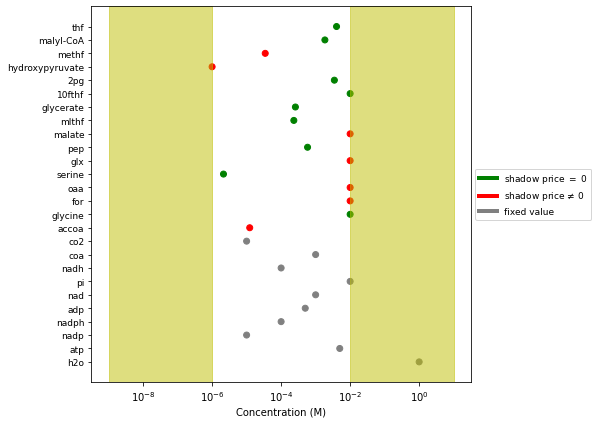

In [9]:
# Ser_mdf.compound_df.to_excel('SerCyc_comp.xlsx')
Ser_comp_plot = Ser_mdf.compound_plot
# Ser_comp_plot.savefig('SerCyc_comp.eps')

In [10]:
Ser_mdf.reaction_df

,reaction_id,reaction_formula,flux,standard_dg_prime,physiological_dg_prime,optimized_dg_prime,shadow_price
0,FTL,"Compound(id=6, inchi_key=ZKHQWZAMYRWXGA-KQYNXX...",1.000 mM/s,-3.574 kJ/mol,-3.574 kJ/mol,-8.234 kJ/mol,2.000000e-01
1,MTHFC,"Compound(id=224, inchi_key=AUFGTPPARQZWDO-YPMH...",1.000 mM/s,6.360 kJ/mol,6.360 kJ/mol,-8.234 kJ/mol,2.000000e-01
2,MTHFD,"Compound(id=9, inchi_key=ACFIXJIJDZMPPO-NNYOXO...",1.000 mM/s,-6.593 kJ/mol,-6.593 kJ/mol,-8.234 kJ/mol,2.000000e-01
3,SHMT,"Compound(id=5, inchi_key=XLYOFNOQVPJJNP-UHFFFA...",1.000 mM/s,6.569 kJ/mol,6.569 kJ/mol,-8.234 kJ/mol,2.000000e-01
4,SGAT,"Compound(id=53, inchi_key=MTCFGRXMJLQNBG-REOHC...",1.000 mM/s,-4.250 kJ/mol,-4.250 kJ/mol,-8.234 kJ/mol,2.000000e-01
5,HPR,"Compound(id=13, inchi_key=BOPGDPNILDQYTO-NNYOX...",1.000 mM/s,-28.130 kJ/mol,-28.130 kJ/mol,-8.234 kJ/mol,1.091220e-16
6,GK,"Compound(id=6, inchi_key=ZKHQWZAMYRWXGA-KQYNXX...",1.000 mM/s,-9.716 kJ/mol,-9.716 kJ/mol,-8.234 kJ/mol,8.876785e-17
7,ENO,"Compound(id=261, inchi_key=GXIURPTVHJPJLF-UWTA...",1.000 mM/s,-4.085 kJ/mol,-4.085 kJ/mol,-8.234 kJ/mol,8.876785e-17
8,PPC,"Compound(id=5, inchi_key=XLYOFNOQVPJJNP-UHFFFA...",1.000 mM/s,-38.976 kJ/mol,-38.976 kJ/mol,-11.740 kJ/mol,0.000000e+00
9,MaDH,"Compound(id=13, inchi_key=BOPGDPNILDQYTO-NNYOX...",1.000 mM/s,-26.606 kJ/mol,-26.606 kJ/mol,-21.259 kJ/mol,0.000000e+00


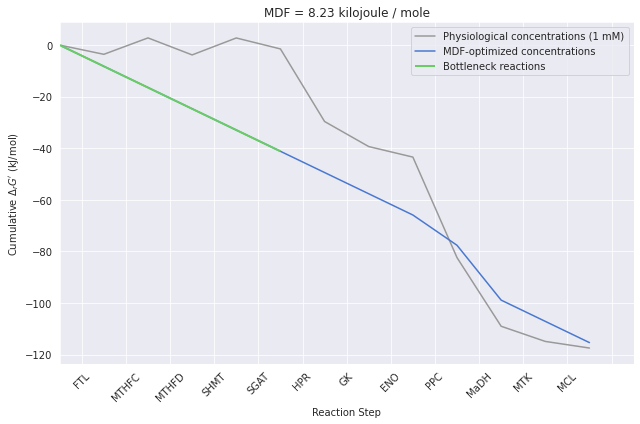

In [11]:
# Ser_mdf.reaction_df.to_excel('SerCyc_Rxn.xlsx')
Ser_rxn_plot = Ser_mdf.reaction_plot
# Ser_rxn_plot.savefig('SerCyc_Rxn.eps')

## 3 The Modified serine cycle
formate + CO2

In [12]:
MSerCyc = Pathway.from_sbtab('MSerCyc.tsv', comp_contrib=comp_contrib)

MSerCyc.update_standard_dgs()
MSer_mdf = MSerCyc.calc_mdf()

print('The modified serine cycle MDF: ',MSer_mdf.mdf)

The modified serine cycle MDF:  8.940 kJ/mol


In [13]:
MSer_mdf.compound_df

,compound,concentration,shadow_price,lower_bound,upper_bound
0,h2o,1.000 M,-1.222823e-16,1.000 M,1.000 M
1,atp,0.005 M,2.500000e-01,5.000 mM,5.000 mM
2,nadp,0.000 M,-2.500000e-01,0.010 mM,0.010 mM
3,nadph,0.000 M,2.500000e-01,0.100 mM,0.100 mM
4,adp,0.001 M,-2.500000e-01,0.500 mM,0.500 mM
5,nad,0.001 M,0.000000e+00,1.000 mM,1.000 mM
6,pi,0.010 M,-2.500000e-01,10.000 mM,10.000 mM
7,nadh,0.000 M,0.000000e+00,0.100 mM,0.100 mM
8,coa,0.001 M,1.896956e-17,1.000 mM,1.000 mM
9,co2,0.000 M,-1.444278e-17,0.010 mM,0.010 mM


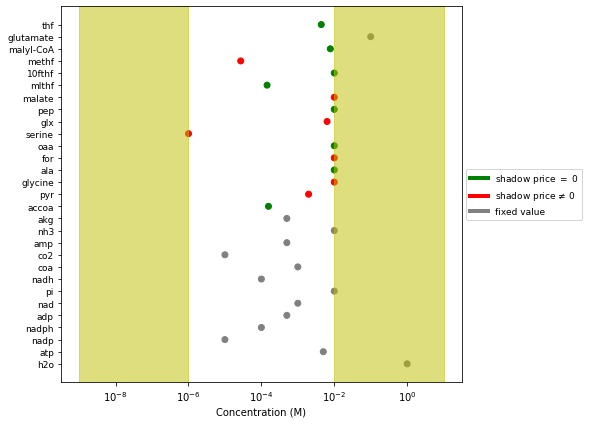

In [14]:
# MSer_mdf.compound_df.to_excel('MSerCyc_comp.xlsx')
Mser_comp_plot = MSer_mdf.compound_plot
# Mser_comp_plot.savefig('MSerCyc_comp.eps')

In [15]:
MSer_mdf.reaction_df

,reaction_id,reaction_formula,flux,standard_dg_prime,physiological_dg_prime,optimized_dg_prime,shadow_price
0,FTL,"Compound(id=6, inchi_key=ZKHQWZAMYRWXGA-KQYNXX...",1.000 mM/s,-3.574 kJ/mol,-3.574 kJ/mol,-8.940 kJ/mol,2.500000e-01
1,MTHFC,"Compound(id=224, inchi_key=AUFGTPPARQZWDO-YPMH...",1.000 mM/s,6.360 kJ/mol,6.360 kJ/mol,-8.940 kJ/mol,2.500000e-01
2,MTHFD,"Compound(id=9, inchi_key=ACFIXJIJDZMPPO-NNYOXO...",1.000 mM/s,-6.593 kJ/mol,-6.593 kJ/mol,-8.940 kJ/mol,2.500000e-01
3,SHMT,"Compound(id=5, inchi_key=XLYOFNOQVPJJNP-UHFFFA...",1.000 mM/s,6.569 kJ/mol,6.569 kJ/mol,-8.940 kJ/mol,2.500000e-01
4,SDH,"Compound(id=53, inchi_key=MTCFGRXMJLQNBG-REOHC...",1.000 mM/s,-28.915 kJ/mol,-46.030 kJ/mol,-20.398 kJ/mol,0.000000e+00
5,PPS,"Compound(id=5, inchi_key=XLYOFNOQVPJJNP-UHFFFA...",1.000 mM/s,-2.313 kJ/mol,-19.428 kJ/mol,-16.050 kJ/mol,-5.551115e-17
6,PPC,"Compound(id=5, inchi_key=XLYOFNOQVPJJNP-UHFFFA...",1.000 mM/s,-38.976 kJ/mol,-38.976 kJ/mol,-18.427 kJ/mol,0.000000e+00
7,MaDH,"Compound(id=13, inchi_key=BOPGDPNILDQYTO-NNYOX...",1.000 mM/s,-26.606 kJ/mol,-26.606 kJ/mol,-21.202 kJ/mol,0.000000e+00
8,MTK,"Compound(id=6, inchi_key=ZKHQWZAMYRWXGA-KQYNXX...",1.000 mM/s,-5.878 kJ/mol,-5.878 kJ/mol,-8.940 kJ/mol,0.000000e+00
9,MCL,"Compound(id=1453, inchi_key=HJQWLHMLMCDAEL-ZTG...",1.000 mM/s,14.554 kJ/mol,-2.561 kJ/mol,-8.940 kJ/mol,0.000000e+00


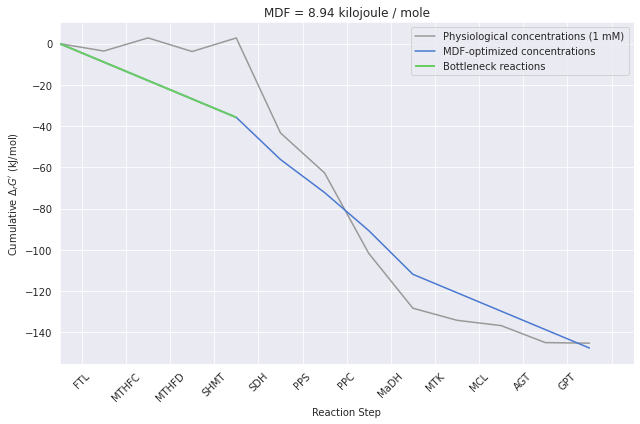

In [16]:
# MSer_mdf.reaction_df.to_excel('MSerCyc_Rxn.xlsx')
MSer_rxn_plt = MSer_mdf.reaction_plot
# MSer_rxn_plt.savefig('MSerCyc_Rxn.eps')

## 4 RuMP
formaldehyde to 1,3-bisphosphoglycerate

In [17]:
RuMP = Pathway.from_sbtab('RuMP.tsv', comp_contrib=comp_contrib)

RuMP.update_standard_dgs()
RuMP_mdf = RuMP.calc_mdf()

print('RuMP cycle MDF: ', RuMP_mdf.mdf)

RuMP cycle MDF:  3.941 kJ/mol


In [18]:
RuMP_mdf.compound_df

,compound,concentration,shadow_price,lower_bound,upper_bound
0,h2o,1.000 M,0.000000,1.000 M,1.000 M
1,atp,0.005 M,0.000000,5.000 mM,5.000 mM
2,adp,0.001 M,0.000000,0.500 mM,0.500 mM
3,nad,0.001 M,0.003198,1.000 mM,1.000 mM
4,pi,0.010 M,0.003198,10.000 mM,10.000 mM
5,nadh,0.000 M,-0.003198,0.100 mM,0.100 mM
6,fald,0.001 M,0.180655,0.001 mM,0.500 mM
7,gap,0.000 M,0.000000,0.001 mM,10.000 mM
8,dhap,0.004 M,0.000000,0.001 mM,10.000 mM
9,r5p,0.000 M,0.000000,0.001 mM,10.000 mM


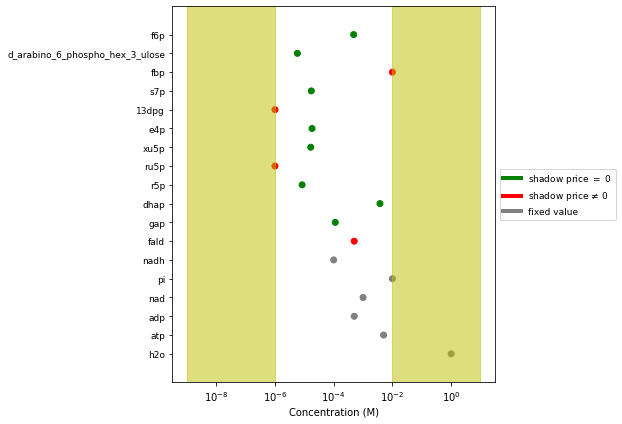

In [19]:
# RuMP_mdf.compound_df.to_excel('RuMP_comp.xlsx')
RuMP_comp_plot = RuMP_mdf.compound_plot
# RuMP_comp_plot.savefig('RuMP_comp.eps')

In [20]:
RuMP_mdf.reaction_df

,reaction_id,reaction_formula,flux,standard_dg_prime,physiological_dg_prime,optimized_dg_prime,shadow_price
0,HPS,"Compound(id=56, inchi_key=WSFSSNUMVMOOMR-UHFFF...",3.000 mM/s,-26.442 kJ/mol,-9.327 kJ/mol,-3.941 kJ/mol,0.180655
1,PHI,"Compound(id=1497, inchi_key=UZYFNQCWJLIAKE-ZMI...",3.000 mM/s,-14.201 kJ/mol,-14.201 kJ/mol,-3.941 kJ/mol,0.180655
2,PFK,"Compound(id=6, inchi_key=ZKHQWZAMYRWXGA-KQYNXX...",1.000 mM/s,-18.827 kJ/mol,-18.827 kJ/mol,-16.163 kJ/mol,0.000000
3,FBA,"Compound(id=396, inchi_key=RNBGYGVWRKECFJ-VRPW...",1.000 mM/s,21.637 kJ/mol,4.522 kJ/mol,-3.941 kJ/mol,0.046763
4,TKT1,"Compound(id=71, inchi_key=LXJXRIRHZLFYRP-VKHMY...",1.000 mM/s,10.138 kJ/mol,10.138 kJ/mol,-3.941 kJ/mol,0.090328
5,TAL,"Compound(id=245, inchi_key=NGHMDNPXVRFFGS-IUYQ...",1.000 mM/s,0.700 kJ/mol,0.700 kJ/mol,-3.941 kJ/mol,0.090328
6,TKT2,"Compound(id=71, inchi_key=LXJXRIRHZLFYRP-VKHMY...",1.000 mM/s,3.833 kJ/mol,3.833 kJ/mol,-3.941 kJ/mol,0.090328
7,RPI,"Compound(id=109, inchi_key=KTVPXOYAKDPRHY-SOOF...",1.000 mM/s,2.015 kJ/mol,2.015 kJ/mol,-3.941 kJ/mol,0.090328
8,RPE,"Compound(id=176, inchi_key=FNZLKVNUWIIPSJ-RFZP...",2.000 mM/s,3.373 kJ/mol,3.373 kJ/mol,-3.941 kJ/mol,0.180655
9,TPI,"Compound(id=74, inchi_key=GNGACRATGGDKBX-UHFFF...",1.000 mM/s,5.407 kJ/mol,5.407 kJ/mol,-3.941 kJ/mol,0.046763


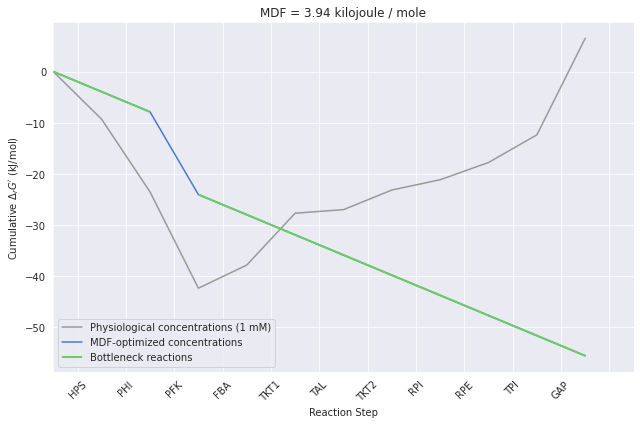

In [21]:
# RuMP_mdf.reaction_df.to_excel('RuMP_Rxn.xlsx')
RuMP_rxn_plt = RuMP_mdf.reaction_plot
# RuMP_rxn_plt.savefig('RuMP_Rxn.eps')

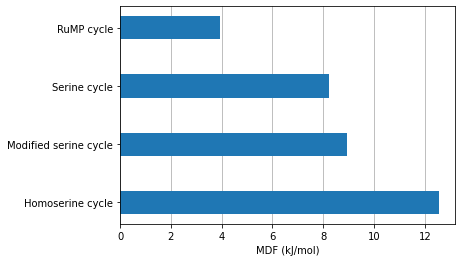

In [22]:
psws = ['Homoserine cycle', 'Modified serine cycle', 'Serine cycle', 'RuMP cycle']
mdf_results = [HS_mdf.mdf.magnitude, MSer_mdf.mdf.magnitude, Ser_mdf.mdf.magnitude, RuMP_mdf.mdf.magnitude]

fig, ax = plt.subplots()
y_pos = np.arange(len(psws))
ax.set_yticks(y_pos)
ax.set_yticklabels(psws)
ax.barh(y_pos, mdf_results, height=0.4, align='center')
ax.set_xlabel('MDF (kJ/mol)')
ax.grid(True,axis='x')
ax.set_axisbelow(True)